In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker


****

In [2]:
path = '../data/tweetsCov19_polarized_users_deletionratio_reputation.tsv'

df_tweetscov19 = pd.read_csv(path, sep='\t', error_bad_lines=False, names=[ "Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (2216076, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [3]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['politic'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (1973156, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,00008ca06f863b962f72cc9167d7978a,-1.0000,0.0000,-1.0000,0.0000,0.1828,False
1,00008de3f61d5f04329ee6867d5475b9,-1.0000,0.0000,1.0000,1.0000,0.6003,True
2,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
3,00012a177385cd6e7590e2acb3f206e3,-1.0000,0.0000,1.0000,1.0000,0.3327,True
4,00016e20a3865cb74581803c27d27b89,-1.0000,0.0000,-1.0000,0.0000,0.5896,False


In [4]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [5]:
df = df_tweetscov19[['politic', 'Reputation']]
df = df.round(1)

In [6]:
df = df.groupby(['politic', 'Reputation']).size().reset_index(name='count')
print(df.shape)

(225, 3)


In [7]:
df.head(10)

,politic,Reputation,count
0,-1.0000,0.0000,9309
1,-1.0000,0.1000,24283
2,-1.0000,0.2000,34297
3,-1.0000,0.3000,46713
4,-1.0000,0.4000,64905
5,-1.0000,0.5000,152544
6,-1.0000,0.6000,75642
7,-1.0000,0.7000,61423
8,-1.0000,0.8000,67803
9,-1.0000,0.9000,119714


In [8]:
heatmap_data = pd.pivot_table(df, values='count', index=['Reputation'], columns=['politic'], aggfunc='sum', fill_value=0)

In [9]:
print(heatmap_data.shape)
#heatmap_data.head(10)
heatmap_data = heatmap_data.replace(np.nan, 0)

#heatmap_data.drop(index=df.index[:1],inplace=True)

(11, 21)


Text(626.1346437500001, 0.5, 'Number of tweets')

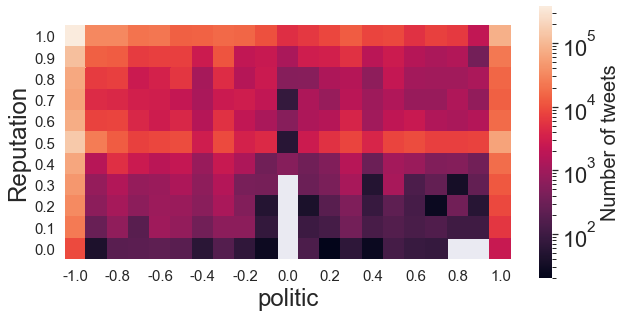

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap_data = heatmap_data.sort_values(by="Reputation",ascending=False)

sns.heatmap(data = heatmap_data, square=True, norm=matplotlib.colors.LogNorm(), cbar_kws={"shrink": 0.5})
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)


<ipython-input-11-b3425827c8a1>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color.set_bad('white')    # if the value is bad the color would be lightblue instead of white


Text(624.7756437500002, 0.5, 'Number of tweets')

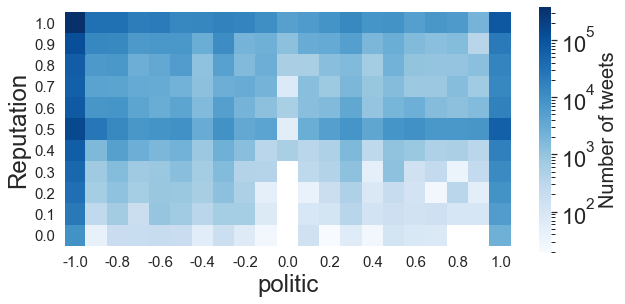

In [11]:
heatmap_data_2 = df.pivot("Reputation", "politic", "count")
heatmap_data_2 = heatmap_data_2.replace(np.nan, 0)
heatmap_data_2 = heatmap_data_2.sort_values(by="Reputation",ascending=False)

color = plt.get_cmap('Blues')   # default color
color.set_bad('white')    # if the value is bad the color would be lightblue instead of white

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heatmap_data_2, square=True, norm= matplotlib.colors.LogNorm(), cbar_kws={"shrink": 0.45}, cmap=color)
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)



<ipython-input-26-07b5db870d8d>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color.set_bad('white')    # if the value is bad the color would be lightblue instead of white


Text(341.26664375000007, 0.5, 'Number of tweets')

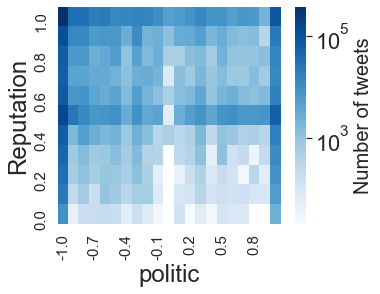

In [26]:
heatmap_data_2 = df.pivot("Reputation", "politic", "count")
heatmap_data_2 = heatmap_data_2.replace(np.nan, 0)
heatmap_data_2 = heatmap_data_2.sort_values(by="Reputation",ascending=False)

color = plt.get_cmap('Blues')   # default color
color.set_bad('white')    # if the value is bad the color would be lightblue instead of white

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(heatmap_data_2, square=False, norm= matplotlib.colors.LogNorm(), cbar_kws={"shrink": 1}, cmap=color)
ax.tick_params(labelsize=15)
ax.figure.axes[-1].set_ylabel('Number of tweets', size=20)



In [116]:
heatmap_data_2.head()

politic,-1.0000,-0.9900,-0.9800,-0.9700,-0.9600,-0.9500,-0.9400,-0.9300,-0.9200,-0.9100,-0.9000,-0.8900,-0.8800,-0.8700,-0.8600,-0.8500,-0.8400,-0.8300,-0.8200,-0.8100,-0.8000,-0.7900,-0.7800,-0.7700,-0.7600,-0.7500,-0.7400,-0.7300,-0.7200,-0.7100,-0.7000,-0.6900,-0.6800,-0.6700,-0.6600,-0.6500,-0.6400,-0.6300,-0.6200,-0.6100,-0.6000,-0.5900,-0.5800,-0.5700,-0.5600,-0.5500,-0.5400,-0.5300,-0.5200,-0.5100,-0.5000,-0.4900,-0.4800,-0.4700,-0.4600,-0.4500,-0.4400,-0.4300,-0.4200,-0.4100,-0.4000,-0.3900,-0.3800,-0.3700,-0.3600,-0.3500,-0.3400,-0.3300,-0.3200,-0.3100,-0.3000,-0.2900,-0.2800,-0.2700,-0.2600,-0.2500,-0.2400,-0.2300,-0.2200,-0.2100,-0.2000,-0.1900,-0.1800,-0.1700,-0.1600,-0.1500,-0.1400,-0.1300,-0.1200,-0.1100,-0.1000,-0.0900,-0.0800,-0.0700,-0.0600,-0.0500,-0.0400,-0.0300,-0.0200,-0.0100,0.0100,0.0200,0.0300,0.0400,0.0500,0.0600,0.0700,0.0800,0.0900,0.1000,0.1100,0.1200,0.1300,0.1400,0.1500,0.1600,0.1700,0.1800,0.1900,0.2000,0.2100,0.2200,0.2300,0.2400,0.2500,0.2600,0.2700,0.2800,0.2900,0.3000,0.3100,0.3300,0.3400,0.3500,0.3600,0.3700,0.3800,0.3900,0.4000,0.4100,0.4200,0.4300,0.4400,0.4500,0.4600,0.4700,0.4800,0.4900,0.5000,0.5200,0.5300,0.5400,0.5500,0.5600,0.5700,0.5800,0.5900,0.6000,0.6100,0.6200,0.6400,0.6500,0.6600,0.6700,0.6800,0.6900,0.7000,0.7100,0.7200,0.7300,0.7400,0.7500,0.7600,0.7700,0.7800,0.7900,0.8000,0.8100,0.8200,0.8300,0.8400,0.8500,0.8600,0.8700,0.8800,0.8900,0.9000,0.9100,0.9200,0.9300,0.9400,0.9500,0.9600,0.9700,0.9800,1.0000
Reputation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0000,211512.0000,919.0000,396.0000,1125.0000,750.0000,1282.0000,2444.0000,3226.0000,2046.0000,2163.0000,446.0000,1306.0000,1125.0000,1000.0000,874.0000,678.0000,1731.0000,502.0000,2594.0000,419.0000,3048.0000,1055.0000,1403.0000,553.0000,285.0000,1324.0000,741.0000,348.0000,0.0000,1323.0000,70.0000,221.0000,1109.0000,1938.0000,288.0000,313.0000,496.0000,529.0000,1177.0000,0.0000,2902.0000,0.0000,1087.0000,1067.0000,892.0000,0.0000,592.0000,101.0000,492.0000,708.0000,2678.0000,248.0000,54.0000,0.0000,0.0000,258.0000,339.0000,952.0000,0.0000,3595.0000,439.0000,0.0000,321.0000,179.0000,0.0000,0.0000,252.0000,4719.0000,0.0000,0.0000,334.0000,257.0000,0.0000,261.0000,0.0000,181.0000,175.0000,356.0000,117.0000,0.0000,2170.0000,0.0000,172.0000,31.0000,0.0000,0.0000,293.0000,1687.0000,224.0000,975.0000,47.0000,581.0000,300.0000,0.0000,94.0000,437.0000,153.0000,0.0000,125.0000,235.0000,1141.0000,0.0000,369.0000,81.0000,0.0000,125.0000,310.0000,262.0000,159.0000,0.0000,897.0000,121.0000,0.0000,1038.0000,0.0000,164.0000,0.0000,108.0000,190.0000,1977.0000,0.0000,383.0000,1021.0000,181.0000,82.0000,75.0000,230.0000,0.0000,344.0000,98.0000,0.0000,3536.0000,0.0000,0.0000,146.0000,347.0000,441.0000,1223.0000,182.0000,454.0000,0.0000,477.0000,0.0000,0.0000,750.0000,0.0000,0.0000,602.0000,2233.0000,108.0000,0.0000,618.0000,0.0000,81.0000,210.0000,67.0000,310.0000,1300.0000,0.0000,308.0000,325.0000,340.0000,0.0000,806.0000,0.0000,0.0000,0.0000,388.0000,0.0000,193.0000,0.0000,884.0000,0.0000,489.0000,208.0000,27.0000,79.0000,0.0000,609.0000,646.0000,254.0000,426.0000,56.0000,0.0000,53.0000,448.0000,0.0000,53.0000,402.0000,0.0000,0.0000,87.0000,0.0000,0.0000,417.0000,43866.0000
0.9900,57884.0000,0.0000,1877.0000,637.0000,2050.0000,1269.0000,998.0000,378.0000,1014.0000,283.0000,458.0000,1306.0000,198.0000,0.0000,1152.0000,844.0000,426.0000,439.0000,932.0000,239.0000,228.0000,621.0000,207.0000,592.0000,579.0000,799.0000,188.0000,852.0000,186.0000,3219.0000,317.0000,263.0000,1459.0000,474.0000,0.0000,64.0000,199.0000,670.0000,123.0000,415.0000,3083.0000,233.0000,268.0000,1129.0000,57.0000,39.0000,47.0000,0.0000,0.0000,0.0000,2111.0000,0.0000,89.0000,605.0000,467.0000,197.0000,759.0000,675.0000,0.0000,227.0000,157.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3106.0000,669.0000,0.0000,0.0000,75